## データ準備

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 分布(distribution)

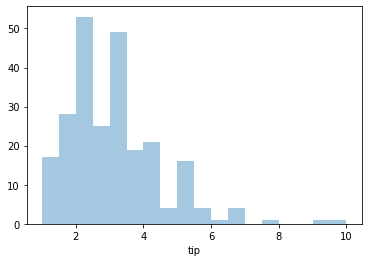

In [3]:
# ヒストグラム(histogram)
sns.distplot(df['tip'], kde=False)

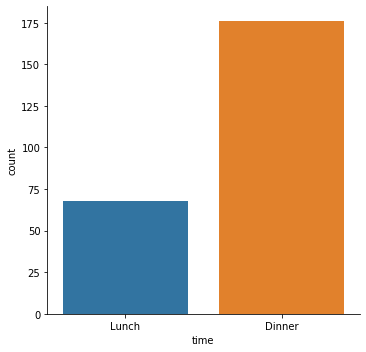

In [4]:
# 棒グラフ
sns.catplot('time', data=df, kind='count')

記述統計と推測統計

記述統計：平均、中央値　標本データを分析する
推測統計：標本から母集団を推測する

代表値

平均値（標本平均と母集団平均）。　
平均からの差を偏差という
平均は偏差の２乗の合計（平方和）を最小にする

### 平均値

In [5]:
np.mean([1, 2, 3])

2.0

In [6]:
np.mean(df['tip'])

2.9982786885245902

In [7]:
np.mean(df['tip_rate'])

0.16080258172250478

In [8]:
df['tip_rate'].mean()

0.16080258172250478

In [9]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [10]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

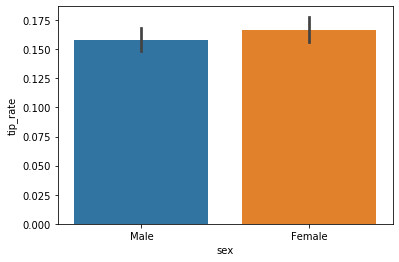

In [11]:
sns.barplot(x='sex', y='tip_rate', data=df)

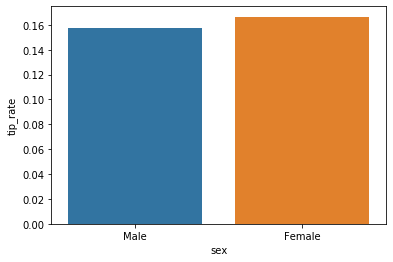

In [12]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

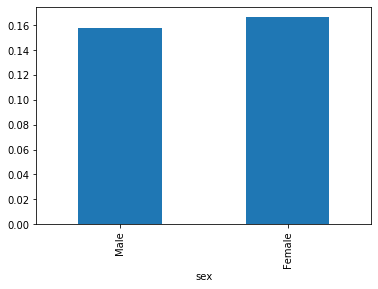

In [13]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

### 中央値

In [14]:
np.median([1, 3, 5])

3.0

In [15]:
np.median(df['tip_rate'])

0.15476977125802577

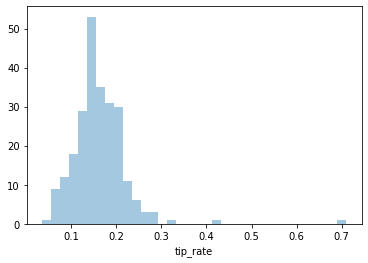

In [16]:
sns.distplot(df['tip_rate'], kde=False)

In [17]:
df['tip_rate'].median()

0.15476977125802577

In [18]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


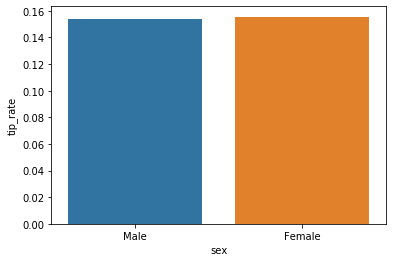

In [19]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [20]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


### 最頻値(mode)

In [21]:
stats.mode([1,2,3,2,2,2,3])

ModeResult(mode=array([2]), count=array([4]))

In [22]:
mode, count = stats.mode([1,2,3,2,2,2,3])
print(mode)
print(count)

[2]
[4]


In [23]:
mode, count = stats.mode(df)

In [24]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [25]:
df['size'].mode()

0    2
dtype: int64

In [26]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

#### 範囲

In [27]:
np.min(df['tip'])

1.0

In [28]:
df['tip'].min()

1.0

In [29]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [30]:
np.max(df['tip'])

10.0

In [31]:
df['tip'].max()

10.0

In [32]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [33]:
df['tip'].max() - df['tip'].min()

9.0

### 四分位数

In [34]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [35]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [36]:
# 四分位範囲（IQR）
stats.iqr(df['tip_rate'])

0.06234812458689154

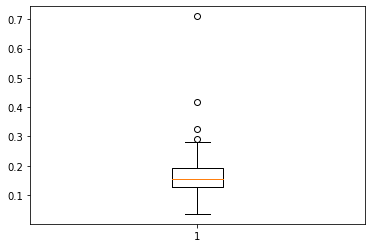

In [37]:
# 箱ひげ図
plt.boxplot(df['tip_rate'])
plt.show()

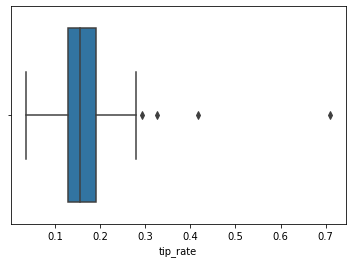

In [38]:
sns.boxplot(df['tip_rate'])
plt.show()

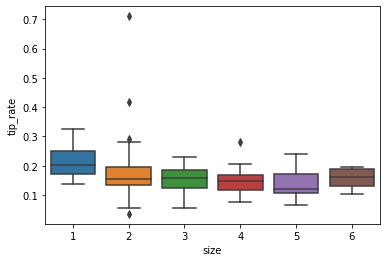

In [39]:
sns.boxplot(x='size', y='tip_rate', data=df)
plt.show()

### 分散（variance）標準偏差（standard deviation）

In [40]:
# 分散
np.var(df['tip_rate'])

0.0037145280013546928

In [41]:
np.var(df['tip'])

1.9066085124966428

In [42]:
# 標準偏差
print(np.std(df['tip_rate']))
print(np.std(df['tip']))

0.060946927743362855
1.3807999538298958


In [43]:
np.sqrt(np.var(df['tip_rate']))

0.060946927743362855

In [44]:
tip_mean = df['tip'].mean()
tip_mean

2.9982786885245902